In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime as dt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [2]:
#df = pd.read_csv('Final_RedWine.csv')
df = pd.read_csv('Final_WhiteWine2.csv')
columns = df.columns

In [3]:
Y = df['quality']
columns = columns[:-1]
df = df.drop('quality', axis=1)

In [4]:
scaler = StandardScaler()
df_StdNorm = scaler.fit_transform(df)
#df_StdNorm =(df - df.mean()) / (df.max() - df.min())
df_StdNorm = pd.DataFrame(data = df_StdNorm, columns=columns ,dtype=float)

c:\users\yash\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\yash\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_StdNorm, Y, test_size=0.15, random_state=42)

In [6]:
#clf=GradientBoostingRegressor(n_estimators = 1000, random_state = 42)
clf=RandomForestRegressor(n_estimators = 1000, n_jobs=-1, random_state = 42)
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [7]:
expected = y_test
predicted = clf.predict(X_test)

In [8]:
# Calculate the absolute errors
errors = abs(predicted - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate Root Mean Square Error
rms = sqrt(mean_squared_error(y_test, predicted))
print('Rmse: ', rms)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')




Mean Absolute Error: 0.42
Rmse:  0.6014703209126577
Accuracy: 92.48 %.


<IPython.core.display.Javascript object>


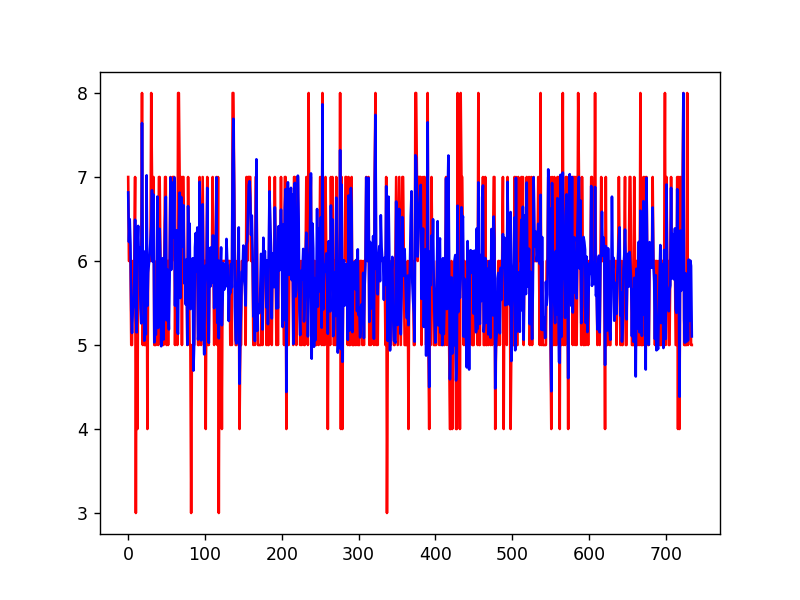

In [44]:
%matplotlib ipympl
y = [n for n in y_test]
y = pd.DataFrame(y)
plt.plot(y,color='red')
plt.plot(predicted, color='blue')
plt.show()